In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_18.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_6.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_3.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_28.jpg
/kaggle/input/gemstones-images/test/Coral/coral_9.jpg
/kaggle/input/gemstones-images/test/Coral/coral_18.jpg
/kaggle/input/gemstones-images/test/Coral/coral_3.jpg
/kaggle/input/gemstones-images/test/Coral/coral_28.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_3.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_9.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_4.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_6.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_28.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_3.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_9.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_18.jpg
/kaggle/in

/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_34.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_2.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_23.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_26.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_31.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_7.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_16.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_29.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_1.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_13.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_24.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_5.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_22.jpg
/kaggle/input/gemstones-images/train/Lapis Lazuli/lapis lazuli_20.jpg
/kaggle/input/gemstones-

/kaggle/input/gemstones-images/train/Pyrite/pyrite_32.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_23.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_11.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_5.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_34.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_25.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_22.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_30.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_45.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_43.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_35.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_38.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_36.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_18.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_19.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_21.jpg
/kaggle/input/gemstones-images/train/Pyrite/pyrite_12.jpg
/kaggle/input/g

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [4]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get("accuracy") > 0.95):
            print("\n Reached 90% accuracy so canceling the training")
            self.model.stop_training=True

In [5]:
TRAINING_DIR = "/kaggle/input/gemstones-images/train/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [6]:
VALIDATION_DIR = "/kaggle/input/gemstones-images/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 2856 images belonging to 87 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)


Found 363 images belonging to 87 classes.


In [9]:
callbacks = myCallbacks()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(87, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=120, steps_per_epoch=70, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks = [callbacks])

model.save("rps.h5")

Epoch 1/120
70/70 [==============================] - 33s 416ms/step - loss: 4.4619 - accuracy: 0.0122 - val_loss: 4.2469 - val_accuracy: 0.0250
Epoch 2/120
70/70 [==============================] - 19s 275ms/step - loss: 4.0138 - accuracy: 0.0351 - val_loss: 3.6597 - val_accuracy: 0.0406
Epoch 3/120
70/70 [==============================] - 18s 265ms/step - loss: 3.7816 - accuracy: 0.0421 - val_loss: 3.3658 - val_accuracy: 0.0938
Epoch 4/120
70/70 [==============================] - 17s 239ms/step - loss: 3.5170 - accuracy: 0.0710 - val_loss: 3.0879 - val_accuracy: 0.1125
Epoch 5/120
70/70 [==============================] - 18s 251ms/step - loss: 3.1587 - accuracy: 0.1224 - val_loss: 2.7128 - val_accuracy: 0.1781
Epoch 6/120
70/70 [==============================] - 17s 246ms/step - loss: 2.9346 - accuracy: 0.1600 - val_loss: 2.7335 - val_accuracy: 0.2062
Epoch 7/120
70/70 [==============================] - 18s 255ms/step - loss: 2.7143 - accuracy: 0.1771 - val_loss: 2.6224 - val_accuracy:

70/70 [==============================] - 17s 242ms/step - loss: 1.2815 - accuracy: 0.6160 - val_loss: 1.5998 - val_accuracy: 0.5750
Epoch 114/120
70/70 [==============================] - 17s 246ms/step - loss: 1.2930 - accuracy: 0.6030 - val_loss: 1.4851 - val_accuracy: 0.6062
Epoch 115/120
70/70 [==============================] - 17s 239ms/step - loss: 1.2886 - accuracy: 0.6277 - val_loss: 1.4273 - val_accuracy: 0.5656
Epoch 116/120
70/70 [==============================] - 17s 246ms/step - loss: 1.1837 - accuracy: 0.6302 - val_loss: 1.8262 - val_accuracy: 0.5688
Epoch 117/120
70/70 [==============================] - 17s 245ms/step - loss: 1.4250 - accuracy: 0.6019 - val_loss: 1.7984 - val_accuracy: 0.5000
Epoch 118/120
70/70 [==============================] - 17s 239ms/step - loss: 1.2955 - accuracy: 0.6227 - val_loss: 2.4167 - val_accuracy: 0.5000
Epoch 119/120
70/70 [==============================] - 17s 241ms/step - loss: 1.3025 - accuracy: 0.6190 - val_loss: 1.7836 - val_accuracy:

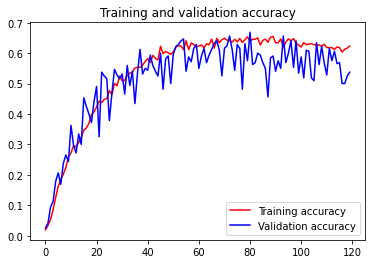

<Figure size 432x288 with 0 Axes>

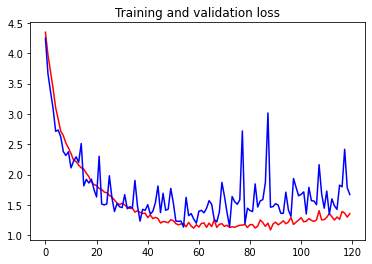

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.show()